**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/deep-neural-networks).**

---


# Introduction #

In the tutorial, we saw how to build deep neural networks by stacking layers inside a `Sequential` model. By adding an *activation function* after the hidden layers, we gave the network the ability to learn more complex (non-linear) relationships in the data.

In these exercises, you'll build a neural network with several hidden layers and then explore some activation functions beyond ReLU. Run this next cell to set everything up!

In [2]:
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('default')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex2 import *

In the *Concrete* dataset, your task is to predict the compressive strength of concrete manufactured according to various recipes.

Run the next code cell without changes to load the dataset.

In [3]:
import pandas as pd

concrete = pd.read_csv('../input/dl-course-data/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# 1) Input Shape #

The target for this task is the column `'CompressiveStrength'`. The remaining columns are the features we'll use as inputs.

What would be the input shape for this dataset?

In [5]:
# YOUR CODE HERE
input_shape = [8]

# Check your answer
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [4]:
# Lines below will give you a hint or solution code
q_1.hint()
q_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Remember to *only* count the input features when determining `input_shape`. You should not count the target (the `CompressiveStrength` column).

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

input_shape = [8]
# you could also use a 1-tuple, like input_shape = (8,)

```

# 2) Define a Model with Hidden Layers #

Now create a model with three hidden layers, each having 512 units and the ReLU activation.  Be sure to include an output layer of one unit and no activation, and also `input_shape` as an argument to the first layer.

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),    
    layers.Dense(1),
])

# Check your answer
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [20]:
# Lines below will give you a hint or solution code
#q_2.hint()
#q_2.solution()

# 3) Activation Layers #

Let's explore activations functions some.

The usual way of attaching an activation function to a `Dense` layer is to include it as part of the definition with the `activation` argument. Sometimes though you'll want to put some other layer between the `Dense` layer and its activation function. (We'll see an example of this in Lesson 5 with *batch normalization*.) In this case, we can define the activation in its own `Activation` layer, like so:

```
layers.Dense(units=8),
layers.Activation('relu')
```

This is completely equivalent to the ordinary way: `layers.Dense(units=8, activation='relu')`.

Rewrite the following model so that each activation is in its own `Activation` layer.

In [22]:
### YOUR CODE HERE: rewrite this to use activation layers
model = keras.Sequential([
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
])
# Check your answer
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [23]:
# Lines below will give you a hint or solution code
#q_3.hint()
#q_3.solution()

# Optional: Alternatives to ReLU #

There is a whole family of variants of the `'relu'` activation -- `'elu'`, `'selu'`, and `'swish'`, among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.

Let's look at the graphs of some of these. Change the activation from `'relu'` to one of the others named above. Then run the cell to see the graph. (Check out the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/activations) for more ideas.)

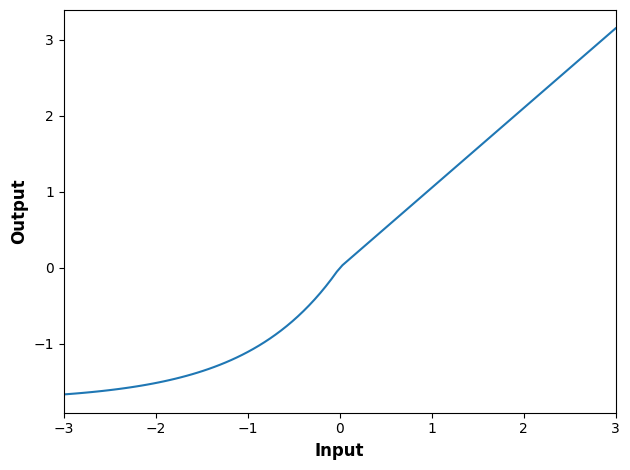

In [26]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('selu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

# Keep Going #

Now move on to Lesson 3 and [**learn how to train neural networks**](https://www.kaggle.com/ryanholbrook/stochastic-gradient-descent) with stochastic gradient descent.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-deep-learning/discussion) to chat with other learners.*